# classifier using pytorch

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Xây dựng một chuẩn hóa đầu vào cho ảnh

transform = transforms.Compose(
  [transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# Khởi tạo dữ trainset qui định dữ liệu training
trainset = torchvision.datasets.CIFAR10(root = './CIFAR10', train = True, 
                                       download = True, transform = transform)

# Khởi tạo trainloader qui định cách truyền dữ liệu vào model theo batch. 
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, 
                                         shuffle = True, num_workers = 2)

# Tương tự nhưng đối với test
testset = torchvision.datasets.CIFAR10(root = './CIFAR10', train = False, 
                                      download = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 4,
                                              shuffle = False, num_workers = 2)

# Nhãn cho các class
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
print(type(trainset[0][0]))
print(trainset[0][0].size())

<class 'torch.Tensor'>
torch.Size([3, 32, 32])


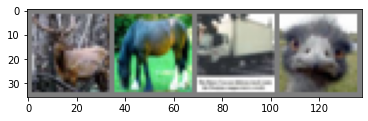

      deer     horse     truck      bird


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('     '+'     '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
print(type(trainloader))
print(images.shape)

<class 'torch.utils.data.dataloader.DataLoader'>
torch.Size([4, 3, 32, 32])


In [6]:
# C1 : dùng nn.Module

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Conv2d: input nodes, output nodes, kernel size
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.1)


In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device)

cuda:0


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [9]:
for epoch in range(2): # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
    # get the inputs, data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
               (epoch + 1, i + 1, running_loss/2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.303
[1,  4000] loss: 2.298
[1,  6000] loss: 2.281
[1,  8000] loss: 2.223
[1, 10000] loss: 2.143
[1, 12000] loss: 2.061
[2,  2000] loss: 1.986
[2,  4000] loss: 1.956
[2,  6000] loss: 1.902
[2,  8000] loss: 1.840
[2, 10000] loss: 1.783
[2, 12000] loss: 1.736
Finished Training


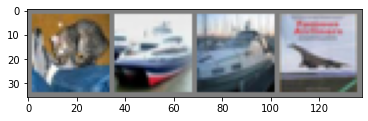

pre:  cat      ship      ship     plane


In [10]:
# Hiển thị một vài dữ liệu
# Sử dụng hàm iter để biến testloader thành 1 iterator, từ đó có thể lấy các giá trị tiếp theo.
dataiter = iter(testloader)
images, labels = dataiter.next()

# print image
imshow(torchvision.utils.make_grid(images))
print('pre:{}'.format('     '.join('%5s' % classes[labels[j]] for j in range(4))))